In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datasets/heart_disease_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
X=df.drop(columns='target',axis=1)

In [17]:
Y=df['target']

<AxesSubplot:xlabel='age', ylabel='target'>

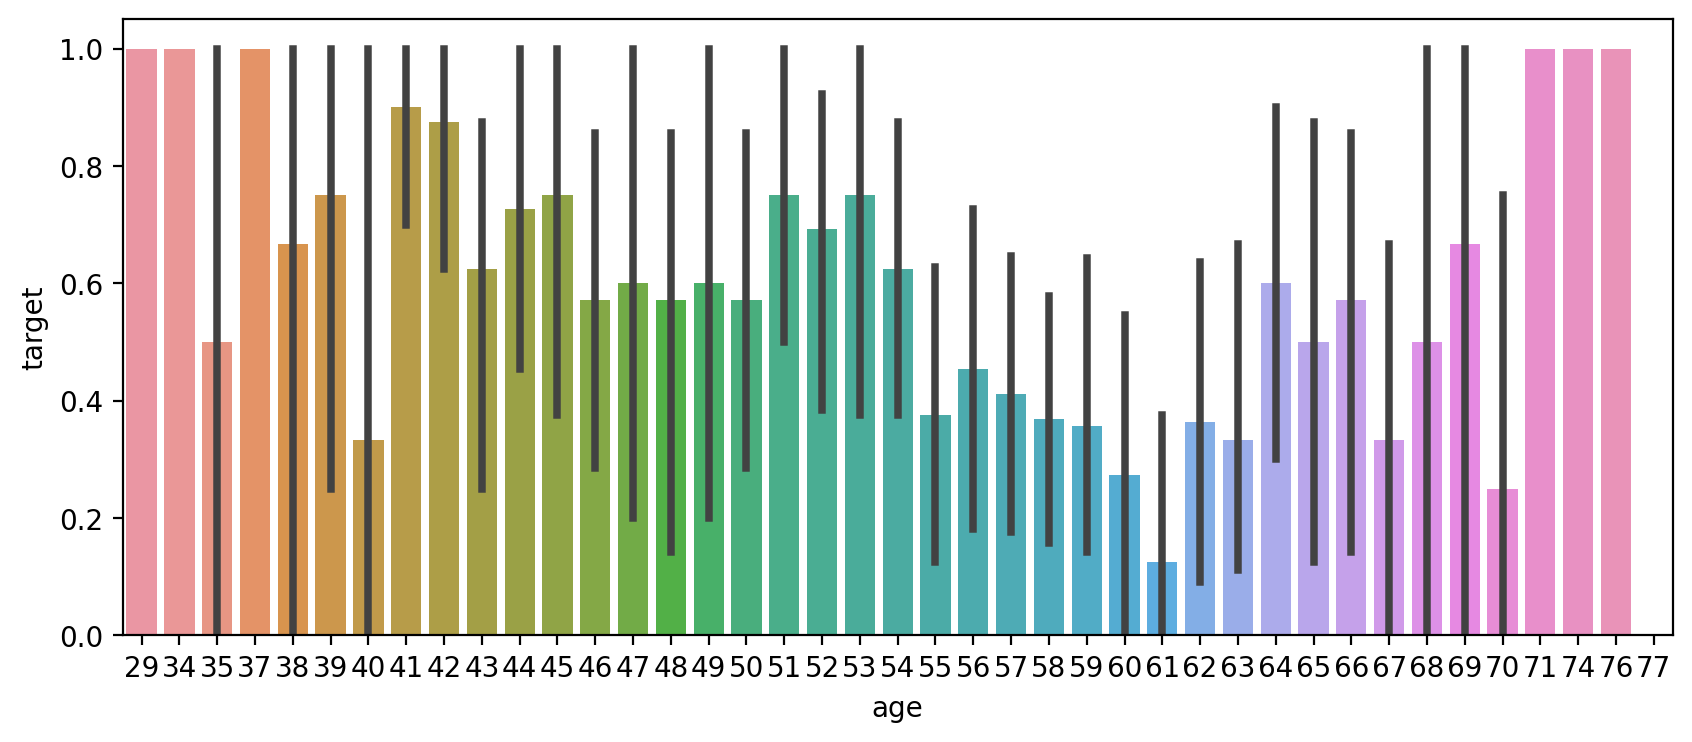

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=df['age'],y=df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

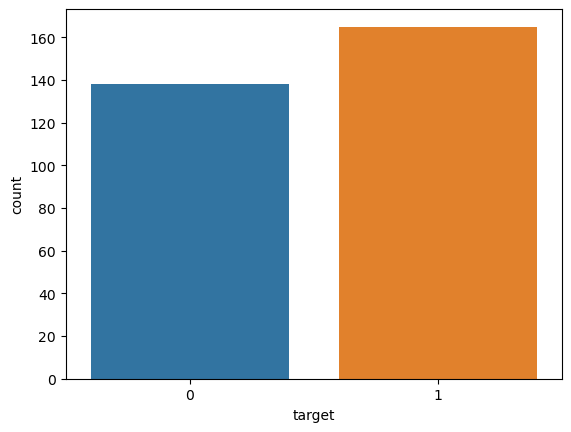

In [28]:
sns.countplot(x='target',data=df)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
n_estimators=[64,100,128,200]
max_features=[5,9,7,12]
bootstrap=[True,False]
oob_score=[True,False]

In [36]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [37]:
from sklearn.model_selection import GridSearchCV

In [41]:
rfc=RandomForestClassifier()
grid_model = GridSearchCV(rfc,param_grid,verbose=2)

In [42]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=5, n_estimators=64, oob_score=False; total time=   0.0s
[CV

[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=100, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_features=7, n_estimators=1

[CV] END bootstrap=False, max_features=5, n_estimators=128, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=128, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=128, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=128, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=128, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=200, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=200, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=200, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=200, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_estimators=200, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=5, n_e

[CV] END bootstrap=False, max_features=7, n_estimators=200, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=7, n_estimators=200, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=7, n_estimators=200, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=7, n_estimators=200, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=7, n_estimators=200, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=12, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=12, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=12, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=12, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=12, n_estimators=64, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_features=12, n_

C:\Users\udaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\udaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\udaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\U

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [5, 9, 7, 12],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]},
             verbose=2)

In [43]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 12, 'n_estimators': 64, 'oob_score': False}

In [44]:
grid_model.best_estimator_

RandomForestClassifier(max_features=12, n_estimators=64)

In [45]:
model=RandomForestClassifier(n_estimators=64,max_features=12)

In [46]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=12, n_estimators=64)

In [50]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
accuracy = accuracy_score(prediction, y_test)

In [51]:
accuracy

0.84

In [57]:
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix,classification_report

C:\Users\udaya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


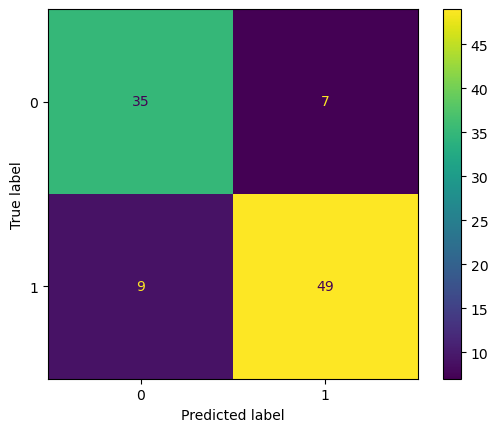

In [58]:
plot_confusion_matrix(model,X_test,y_test)

In [61]:
def report_model(model):
    model_preds=model.predict(X_test)
    print(classification_report(y_test,model_preds))

In [62]:
report_model(model)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.88      0.84      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [63]:
import pickle

In [65]:
pickle.dump(model,open('heart_model.pkl','wb'))

In [66]:
loaded_model = pickle.load(open('heart_model.pkl', 'rb'))

In [68]:
for i in X.columns:
    print(i)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
